In [1]:
%load_ext autoreload
%autoreload 2

import mlproof as mlp
import mlproof.nets as nets

import numpy as np

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
cnn = nets.MergeNet()

CNN configuration: 
    Our CNN with different "legs" for image, prob, merged_array, border_overlap.
    


In [3]:
X_train, y_train, X_test, y_test = mlp.Patch.load('cylinder_small1')

Loaded /home/d/patches/cylinder_small1/ in 0.000457048416138 seconds.


In [4]:
cnn = cnn.fit({'image_input': X_train['image'],
               'prob_input': X_train['prob'],
               'binary_input': X_train['merged_array'],
               'border_input': X_train['border_overlap']},
               y_train)

# Neural Network with 1511874 learnable parameters

## Layer information

  #  name          size
---  ------------  --------
  0  image_input   1x75x75
  1  image_conv1   16x63x63
  2  image_pool1   16x31x31
  3  image_conv2   16x19x19
  4  image_pool2   16x9x9
  5  prob_input    1x75x75
  6  prob_conv1    16x63x63
  7  prob_pool1    16x31x31
  8  prob_conv2    16x19x19
  9  prob_pool2    16x9x9
 10  binary_input  1x75x75
 11  binary_conv1  16x63x63
 12  binary_pool1  16x31x31
 13  binary_conv2  16x19x19
 14  binary_pool2  16x9x9
 15  border_input  1x75x75
 16  border_conv1  16x63x63
 17  border_pool1  16x31x31
 18  border_conv2  16x19x19
 19  border_pool2  16x9x9
 20  merge         64x9x9
 21  hidden3       256
 22  dropout3      256
 23  output        2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.58265       0.48079      1.21186      0.76618  29.77s
      2       0.47341    

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50 and data augmentation
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['border_overlap']},
           y_test)

0.852569018404908

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

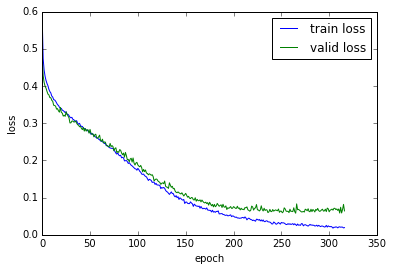

In [6]:
# this is the plot on cylinder_small1 with regularization and patience counter 50 and data augmentation
plot_loss(cnn)

In [5]:
# this is the score on cylinder_small1 with regularization and patience counter 50
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['border_overlap']},
           y_test)

0.8312883435582822

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

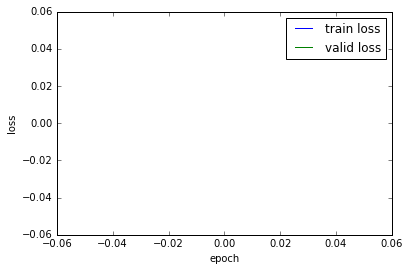

In [6]:
# this is the plot on cylinder_small1 with regularization and patience counter 50
plot_loss(cnn)

In [5]:
# this is the score on cylinder_small1 with regularization
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['border_overlap']},
           y_test)

0.8224693251533742

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

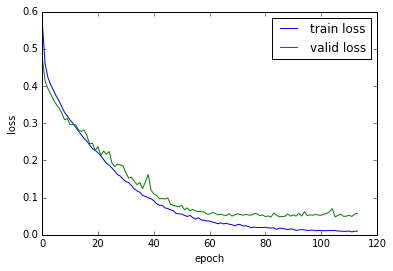

In [6]:
# this is the plot on cylinder_small1 with regularization
plot_loss(cnn)

In [6]:
# this is the score on cylinder_small1 without regularization
cnn.score({'image_input': X_test['image'],
           'prob_input': X_test['prob'],
           'binary_input': X_test['merged_array'],
           'border_input': X_test['border_overlap']},
           y_test)

0.8017638036809815

<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

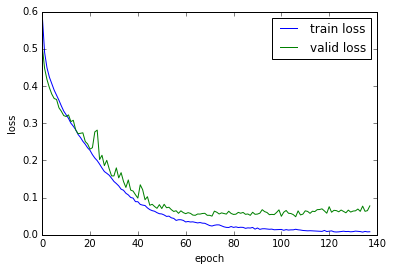

In [7]:
# this is the plot on cylinder_small1 without regularization
plot_loss(cnn)